# Packages utiles

Comme vu dans l'introduction JULIA possède une bibliotèque de package assez grande dont il n'est pas forcément aisé dans faire le tri...

Je vous propose ici la description et utilisation de quelques classiques

En premier lieu deux packages graphiques :
* **PyPlot**
* **Gadfly**

et deux packages plus "statistiques" : 

* **DataFrames**
* **Rdatasets**

# Graphiques

La gestion graphique ne fait pas pertie intégrante de JULIA il faut faire appel à des packages extérieurs et on plusieurs choix possible en voici quelques uns

## PyPlot

PyPlot est basé sur une bibiliothèque éprouvée MatPlotLib (en Python). Sa syntaxe est identique à celle de MATLAB 

In [1]:
Pkg.add("PyPlot")
Pkg.update()
using PyPlot # nécessite d'avoir déjà fait Pkg.add("PyPlot")

INFO: Package PyPlot is already installed
INFO: Updating METADATA...
INFO: Computing changes...
INFO: No packages to install, update or remove


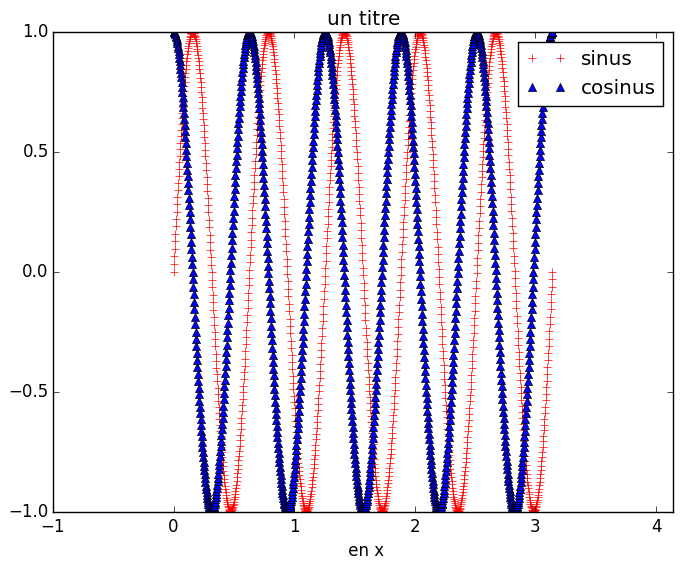

PyObject <matplotlib.legend.Legend object at 0x7f4748205c10>

In [2]:
x=linspace(0,pi,1000);
plot(x,sin.(10*x),"r+",x,cos.(10*x),"b^")
title("un titre")
xlabel(" en x ") #ylabel
xlim(-1,pi+1) #ylim
legend(["sinus","cosinus"])

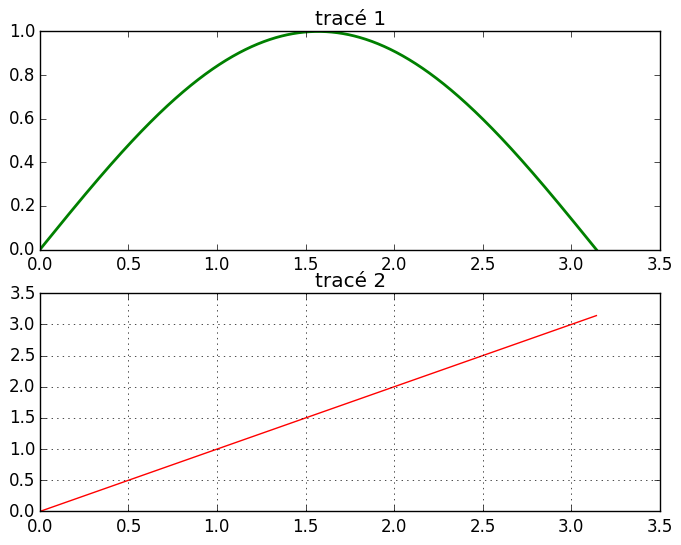

PyObject <matplotlib.text.Text object at 0x7f4748061f10>

In [3]:
g=figure()
subplot(2,1,1)
plot(x,sin.(x),"g",linewidth=2.0)
title("tracé 1")
subplot(2,1,2)
plot(x,x,"r")
grid(true)
title("tracé 2")

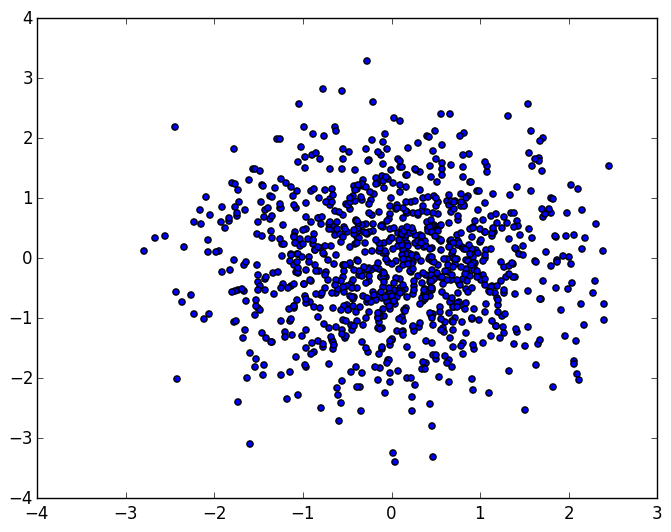

/usr/lib64/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


PyObject <matplotlib.collections.PathCollection object at 0x7f4747f0a650>

In [4]:
n=1024
X=randn(n)
Y=randn(n)
scatter(X,Y)

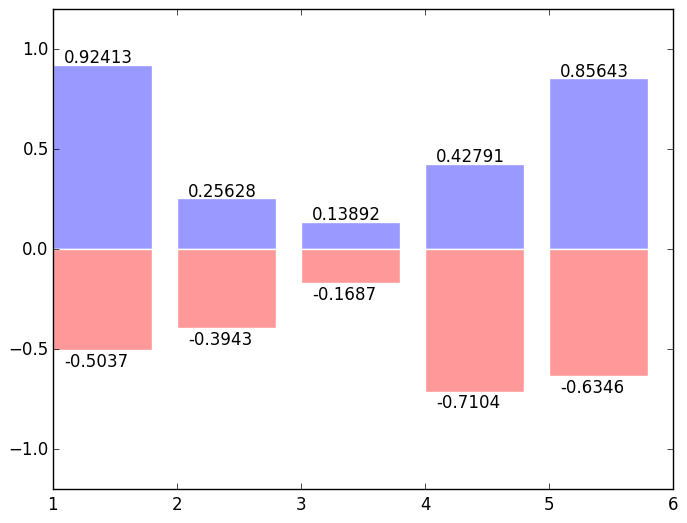

(-1.2, 1.2)

In [5]:
X=rand(5)
Y=-rand(5)
bar(1:5,X,facecolor="#9999ff", edgecolor="white")
bar(1:5,Y,facecolor="#ff9999", edgecolor="white")
for i=1:5
    txt=string(X[i])
    text(i+0.1,X[i]+0.01,txt[1:7])
    txt=string(Y[i])
    text(i+0.1,Y[i]-0.08,txt[1:7])
end
ylim(-1.2,1.2)

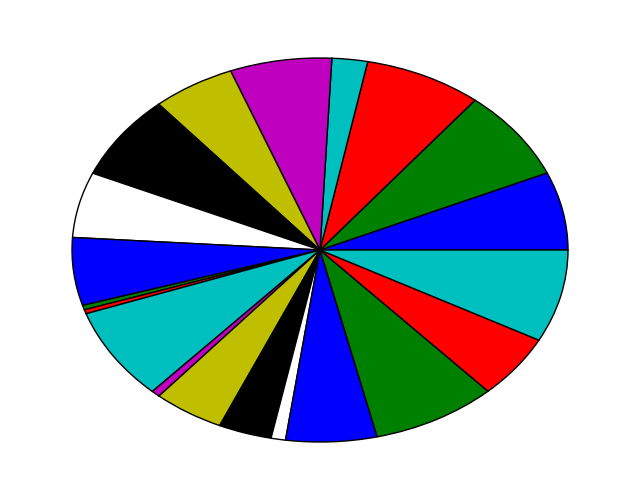

In [6]:
z=rand(20)
pie(z);

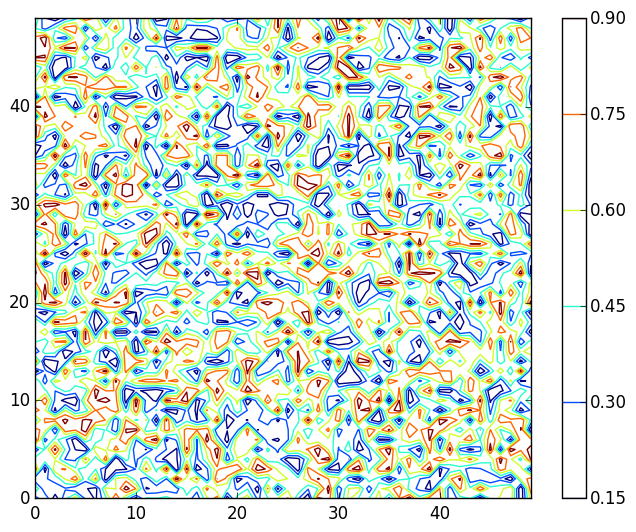

/usr/lib64/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


PyObject <matplotlib.colorbar.Colorbar instance at 0x7f4747ad3440>

In [7]:
contour(rand(50,50))
colorbar()

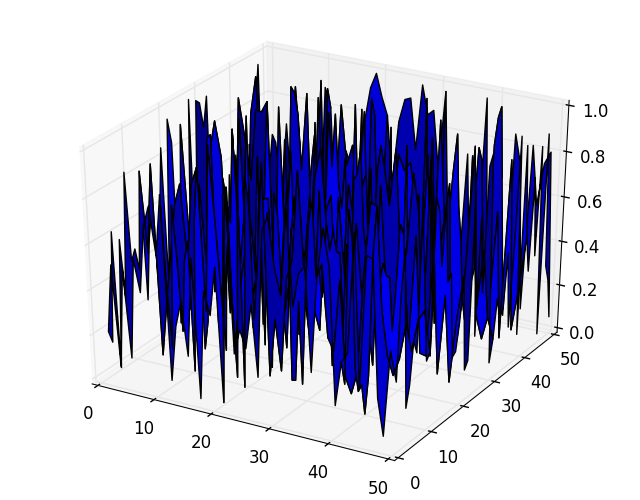

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7f4747a75390>

In [8]:
surf(rand(50,50))

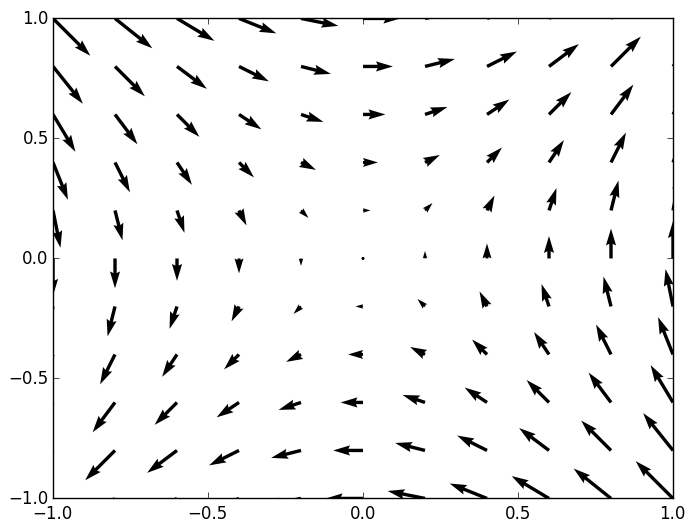

PyObject <matplotlib.quiver.Quiver object at 0x7f4747971390>

In [9]:
X=[x for x=-1:0.2:1, y=-1:0.2:1]
Y=[y for x=-1:0.2:1, y=-1:0.2:1]
quiver(-1:0.2:1,-1:0.2:1,X,Y)

## Gadfly

Gadfly est basé sur la bibliothèque ggplot2 que l'on retrouve dans R.

L'utilisation de Gafly en même temps que PyPlot peut généré des conflits sur la commande plot qui devient Gadfly.plot ou alors en relançant un nouveau kernel...

In [10]:
Pkg.add("Gadfly")
using Gadfly

INFO: Package Gadfly is already installed


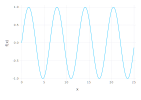

In [11]:
Gadfly.plot(sin,0,25)

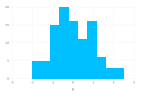

In [12]:
Gadfly.plot(x=randn(100), Geom.histogram(bincount=10))

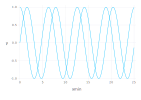

In [13]:
Gadfly.plot(layer(sin,0,25),layer(cos,0,25))

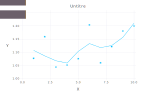

In [14]:
Gadfly.plot(x=1:10, y=2.^rand(10),
     Scale.y_sqrt, Geom.point, Geom.smooth,
Guide.xlabel("X"), Guide.ylabel("Y"), Guide.title("Un titre"))

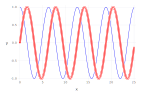

In [15]:
Gadfly.plot(
                  layer(x=collect(1:2500)/100,y=sin.(collect(1:2500)/100),
                  Geom.line,Geom.point,
                  Theme(default_color=colorant"red")),

                  layer(x=collect(1:2500)/100,y=cos.(collect(1:2500)/100),
                  Geom.line,
                  Theme(default_color=colorant"blue"))
    )

D'autres packages sont disponible Winston, AsciiPlot, GLVisualize...

# DataFrames

Ce package permet de faire de la programmation en statistique.

Il introduit en autres :

* Les valeurs manquantes NA
* Le type DataArray (des Array qui peuvent contenir des NA)
* Le type DataFrame

## Type DataArray

In [16]:
Pkg.add("DataFrames")
using DataFrames

INFO: Package DataFrames is already installed


Création d'un DataArray incluant un NA (Not Applicable), 

In [ ]:
myda = @data([NA, 1, 2, 3, 4])

Pour pouvoir calculer une moyenne il faut régler le problèmes des NA en les enlevant :

In [ ]:
dropna(myda) # on enlève les valeurs NA
mean(dropna(myda)) # on fait la moyenne

ou en les remplaçant par une valeur (ici on choisit une valeur arbitrairement mais il existe des règles de statistiques quant au choix du remplacement du NA) :

In [ ]:
myda = @data([NA, 1, 2, 3, 4])
mean(convert(Array,myda, 0))

Les DataArray peuvent être vus comme des objets à N dimensions surlesquels on peut appliquer les mêmes opérations de base que sur les Array (package Base de JULIA) comme par exemple :

In [ ]:
mydamult = @data([NA 0.0; 0.0 1.0])
mydamult * mydamult

## Type DataFrames

But : travailler avec des tables de données.
Ce sont des tables dont les colonnes sont des DataArray. Voici deux façons de construire des DataFrames :

In [ ]:
df = DataFrame(A = 1:4, B = ["M", "F", "F", "M"])

In [ ]:
df = DataFrame()
df[:A] = 1:8;
df[:B] = ["M", "F", "F", "M", "F", "M", "M", "F"];
df

In [ ]:
nrows = size(df, 1) # nombre de ligne
ncols = size(df, 2) # nombre de colonne

In [ ]:
head(df)#Voir le début du tableau

In [ ]:
tail(df) #Voir la fin du tableau

In [ ]:
df[1:3, :] #Voir les lignes 1,2,3 du tableau

Nous avons l'analogie avec summarize du logiciel R :

In [ ]:
describe(df)

In [ ]:
mean(df[:A])#Moyenne sur la colonne intitulée A (première colonne)

In [ ]:
median(df[:A])

In [ ]:
mean(df[1]) #Moyenne sur la première colonne

Pour aller plus loin dans le travail statistique sur les Dataframes il nous faut le package RDatasets qui va fournir nombres exemples et on va y retrouver beaucoup de fonctionnalités communes au logiciel R.

## RDatasets

In [ ]:
Pkg.add("RDatasets")
using RDatasets, Gadfly

In [ ]:
Gadfly.plot(dataset("datasets", "iris"), x="SepalLength", y="SepalWidth", Geom.point)

In [ ]:
Gadfly.plot(dataset("car", "SLID"), x="Wages", color="Language", Geom.histogram)